## Linear Regression

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
# reading
#read text file into a Dataframe
df = pd.read_csv("housing_prices.csv")

In [2]:
#data.columns
df['MSZoning'].apply(str)

0       RL
1       RL
2       RL
3       RL
4       RL
        ..
1455    RL
1456    RL
1457    RL
1458    RL
1459    RL
Name: MSZoning, Length: 1460, dtype: object

In [3]:
df['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [4]:
X = df.drop(columns=['SalePrice'])
y = df['SalePrice']

### Train-test split
Before performing a deeper exploration, we will split the dataset into 2 chunks: train and test. We will use the train set to find patterns in the data and create a model. The test set will remain untouched, unseen, unexplored. It will be the "reality check" for our model, it will let us know whether our model is able to generalize.

Here, we're using the function train_test_split to shuffle the observations randomly and create the train and test sets for both the X and the y objects at the same time, ensuring that they are shuffled the same way:

In [6]:
#Data_Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=123000)
#X_train.head()

### Creating the "numeric pipe" and the "categoric pipe"

In [7]:
# import
from sklearn.preprocessing import OneHotEncoder
# select categorical and numerical column names
X_cat_columns = X.select_dtypes(exclude="number").copy().columns
X_num_columns = X.select_dtypes(include="number").copy().columns

# create numerical pipeline, only with the SimpleImputer(strategy="median" and data scaling)
scaler = StandardScaler(with_mean=False)
numeric_pipe = make_pipeline(scaler,SimpleImputer(strategy="median"))
 
 # create categorical pipeline, with the SimpleImputer(fill_value="N_A") and the OneHotEncoder
categoric_pipe = make_pipeline(
    SimpleImputer(strategy="most_frequent"),   #"most_frequent"
    OneHotEncoder(handle_unknown='ignore') 
)

### Using ColumnTransformer a pipeline with 2 branches (the preprocessor)
##### We simply tell the pipeline the following:

##### One branch, called "num_pipe", will apply the steps in the numeric_pipe to the columns named in X_num_columns
##### The second branch, called "cat_pipe", will apply the steps in the categoric_pipe to the columns named in X_cat_columns

In [8]:
# display pipeline
from sklearn import set_config
set_config(display = 'diagram')

In [9]:
from sklearn.compose import ColumnTransformer  #make_column_Transformer then dont need to mention names

preprocessor = ColumnTransformer(
    transformers=[
        ("num_pipe", numeric_pipe , X_num_columns),
        ("cat_pipe", categoric_pipe, X_cat_columns),
    ]
)

preprocessor

ColumnTransformer(transformers=[('num_pipe',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler(with_mean=False)),
                                                 ('simpleimputer',
                                                  SimpleImputer(strategy='median'))]),
                                 Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFl...
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object'))])

In [9]:
X_cat_columns

In [10]:
X_num_columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [12]:
#scaling and creating linerreg model
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
full_pipeline = make_pipeline(preprocessor)
#full_pipeline.named_steps

In [14]:
full_pipeline.fit(X_train, y_train) #training the machine

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler(with_mean=False)),
                                                                  ('simpleimputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtU...
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object'))]))])

In [15]:
X_train_cleaned = full_pipeline.transform(X_train)
X_train_cleaned

<1168x284 sparse matrix of type '<class 'numpy.float64'>'
	with 79572 stored elements in Compressed Sparse Row format>

In [16]:
X_test_cleaned = full_pipeline.transform(X_test)
X_test_cleaned

<292x284 sparse matrix of type '<class 'numpy.float64'>'
	with 19851 stored elements in Compressed Sparse Row format>

### Creating dataframes from cleaned data (needed later during scaling)

In [16]:
X_train_cleaned_df = pd.DataFrame(X_train_cleaned)


In [17]:
X_test_cleaned_df = pd.DataFrame(X_test_cleaned)


### Creating our first Linear Model

In [18]:
array = np.array(X_train_cleaned).reshape(-1)
#array

In [19]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train_cleaned, y_train)

LinearRegression()

In [20]:
print(
    lm.coef_, 
    lm.intercept_
    )

[ 1.04966719e+03 -1.21942569e+03  2.19838538e+03  9.26707178e+03
  7.91868763e+03  6.49990262e+03  8.97371103e+03  1.19655885e+03
  3.05695369e+03  8.56445704e+03  7.96094830e+02  1.79785042e+01
  9.37748480e+03  5.75344551e+03  1.61884542e+04 -1.90465399e+03
  1.74937299e+04  3.41692437e+02 -2.91712113e+02  3.02238729e+03
  4.72545302e+02 -5.33627347e+03 -2.80867649e+03  3.58939195e+03
  1.49757525e+03  9.36970717e+02  3.10798705e+03  2.33187747e+03
  2.09338693e+03  1.11468055e+03 -9.64917321e+02  5.24525033e+02
  2.09868899e+03  4.18055417e+03  2.27633311e+03 -8.60814920e+02
 -6.94310412e+02 -2.01714595e+04  1.07833913e+04  7.58657248e+03
  2.67867163e+03 -8.77175949e+02 -2.30900240e+04  2.30900240e+04
  5.47559581e+02 -5.47559581e+02  7.32193514e+02  8.29392440e+02
 -3.56265107e+03  2.00106512e+03  3.81312606e+03  6.98072914e+03
 -1.39757972e+04  3.18194205e+03  2.11669119e+04 -2.11669119e+04
 -4.48210652e+02  9.82338369e+03 -7.82732390e+03 -7.89985488e+01
 -1.46885059e+03  1.54085

## Results on test set¶

In [21]:
lm.predict(X_train_cleaned)

array([131707.10676362, 260385.77014101, 163689.21761955, ...,
       112606.03136239, 143683.26510478, 133378.44562076])

In [22]:
results = pd.DataFrame({
    'predictions':lm.predict((X_test_cleaned)), 
    'true_values':y_test
})
results.head() 

,predictions,true_values
1398,119562.365182,138000
955,196894.506174,145000
480,337592.995806,326000
1088,133343.525576,137500
647,148066.553019,155000


* Mean Squared Error (MSE): is calculated as the mean or average of the squared differences between predicted and expected target values.
$$MSE = \frac{1}{n}\sum_{i=1}^{n}(y_{i} - y_{e})^{2}$$

In [23]:
mse_pre = (results
               .assign(diff = lambda x: (x.true_values - x.predictions)**2)
               .agg({'diff':{'sum','count'}}))
mse = mse_pre.loc['sum'] / mse_pre.loc['count']
mse

diff    1.144062e+09
dtype: float64

In [24]:
# check our results with sklearn metrics
mod_res = {}
mod_res['1st_iter'] = {}
from sklearn.metrics import mean_squared_error
mod_res['1st_iter']['mse'] = mean_squared_error(results.true_values, results.predictions)
mod_res['1st_iter']['mse']

1144061553.4012957

In [25]:
mse_pre = (results
               .assign(diff = lambda x: (x.true_values - x.predictions)**2)
               .agg({'diff':{'sum','count'}}))
mse = mse_pre.loc['sum'] / mse_pre.loc['count']
mse

diff    1.144062e+09
dtype: float64

* Root Mean Squared Error (RMSE): 
$$RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_{i} - y_{e})^{2}}$$

In [26]:
# check our results with sklearn metrics
mod_res = {}
mod_res['1st_iter'] = {}
from sklearn.metrics import mean_squared_error
mod_res['1st_iter']['mse'] = mean_squared_error(results.true_values, results.predictions)
mod_res['1st_iter']['mse']

1144061553.4012957

* Mean Absolute Error (MAE)
$$MAE = \frac{1}{n}\sum_{i=1}^{n} |y_{i} - y_{e}|$$

In [27]:
mae_pre = (results
               .assign(diff = lambda x: abs(x.true_values - x.predictions))
               .agg({'diff':{'sum','count'}}))
mod_res['1st_iter']['mae'] = mae_pre.loc['sum'] / mae_pre.loc['count']
mod_res['1st_iter']['mae']

diff    18403.19986
dtype: float64

In [28]:
# check our results with sklearn metrics
from sklearn.metrics import mean_absolute_error
mod_res['1st_iter']['mae'] = mean_absolute_error(results.true_values, results.predictions)
mod_res['1st_iter']['mae']

18403.199859823835

* Mean Absolute Percentage Error (MAPE)

$$MAPE = \frac{1}{n}\sum_{i=1}^{n} |\frac{y_{i} - y_{e}}{y_{i}}|$$

In [29]:
# Given that MAPE (mean absolute percentage error) doesn't exist in this version of sklearn, let's write a function:
def mean_abs_perc_error(y_true, y_pred):
    results = pd.DataFrame({
        'predictions':y_pred,
        'true_values':y_true
    })
    mape_pre = (results
               .assign(diff = lambda x: abs(x.true_values - x.predictions)/x.true_values)
               .agg({'diff':{'sum','count'}}))
    mape = mape_pre.loc['sum'] / mape_pre.loc['count']
    return mape.values[0]

# from sklearn.metrics import mean_absolute_percentage_error
mod_res['1st_iter']['mape'] = mean_abs_perc_error(results['true_values'], results['predictions'])
mod_res['1st_iter']['mape']
mod_res

{'1st_iter': {'mse': 1144061553.4012957,
  'mae': 18403.199859823835,
  'mape': 0.10531902043942531}}


        MSE: 1144061553.4012957
        RMSE: 33823.978970566066
        MAE: 18403.199859823835
        MAPE: 0.10531902043942531
        
466500 37900


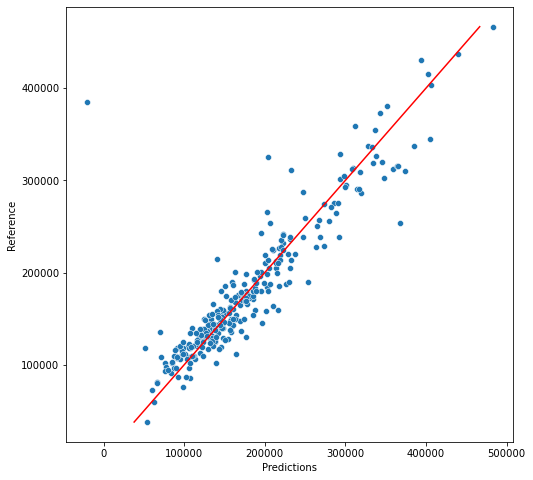

In [30]:
def plot_predictions(y_true, y_pred): 
    print(
        f"""
        MSE: {mean_squared_error(y_true, y_pred)}
        RMSE: {mean_squared_error(y_true, y_pred)**0.5}
        MAE: {mean_absolute_error(y_true, y_pred)}
        MAPE: {mean_abs_perc_error(y_true, y_pred)}
        """
    )
    
    max_preds = min([max(y_pred.tolist()), max(y_true.tolist())])
    min_preds = max([min(y_pred.tolist()), min(y_true.tolist())])
    
    print(max_preds, min_preds)
    # plot
    plt.figure(figsize=(8,8))
    sns.scatterplot(x=y_pred, y=y_true)
    sns.lineplot(x=[min_preds,max_preds], y=[min_preds, max_preds], color='red')
    plt.ylabel('Reference')
    plt.xlabel('Predictions')
    plt.show()

    return {
        'mse': mean_squared_error(y_true, y_pred), 
        'rmse': mean_squared_error(y_true, y_pred)**0.5,
        'mae': mean_absolute_error(y_true, y_pred),
        'mape': mean_abs_perc_error(y_true, y_pred)
    }

mod_res['1st_iter'] = plot_predictions(y_test, results['predictions'])

In [31]:
## correlation matrix

## get correlations
df_corr = df.corr()

## irrelevant fields to be defined
fields = ['SalePrice']

## drop rows if needed
df_corr.drop(fields, inplace=True)

## drop cols if needed
df_corr.drop(fields, axis=1, inplace=True)

df_corr.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347


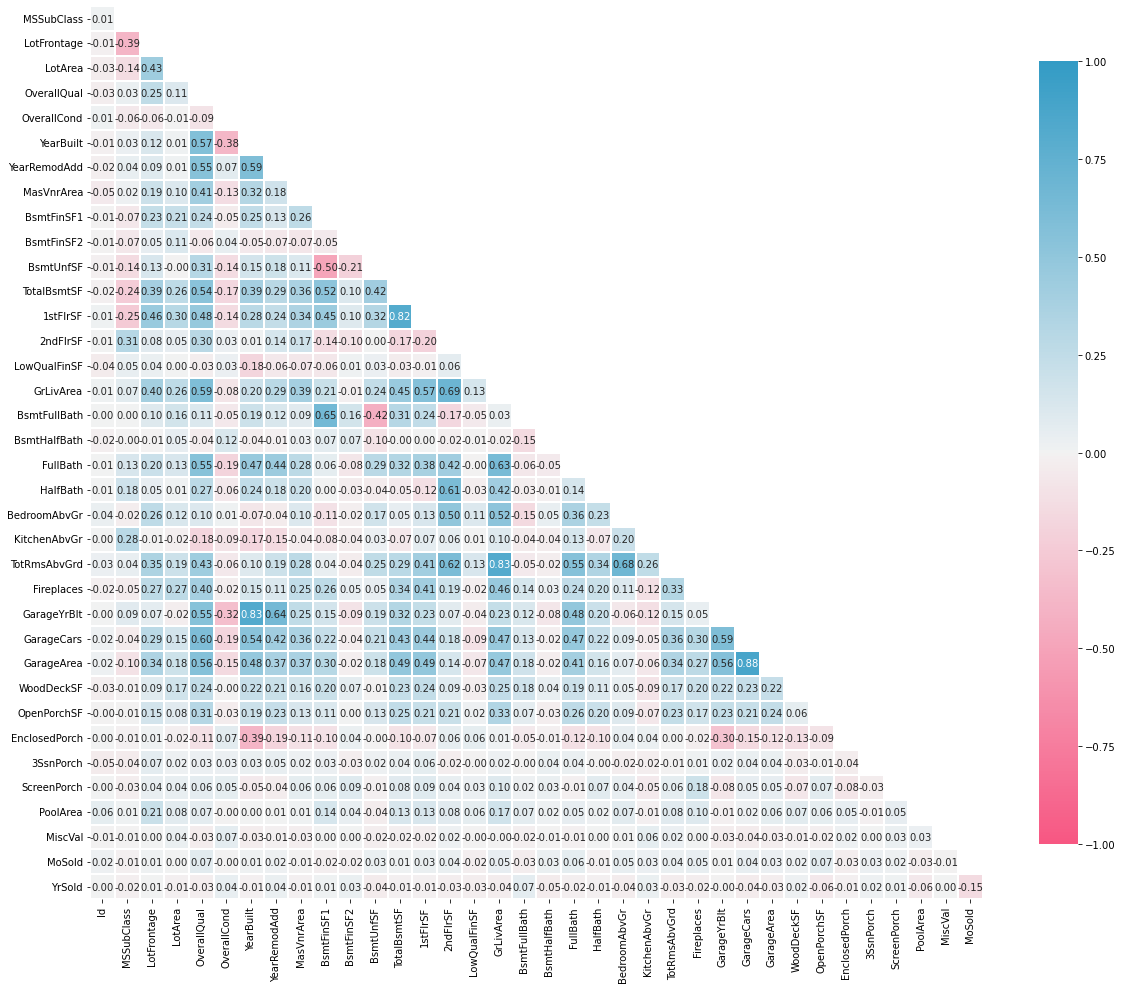

In [32]:
## plotting the heatmap to identify highly correlated features 

fig, ax = plt.subplots(figsize=(20,18))
## mask
mask = np.triu(np.ones_like(df_corr, dtype=np.bool_))

## adjust mask and df
mask = mask[1:, :-1]
corr = df_corr.iloc[1:,:-1].copy()

## color map
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)

## plot heatmap
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap=cmap,
           linewidths=2,
           vmin=-1, vmax=1, cbar_kws={"shrink": .8},square=True)

## yticks
plt.yticks(rotation=0)
plt.show()


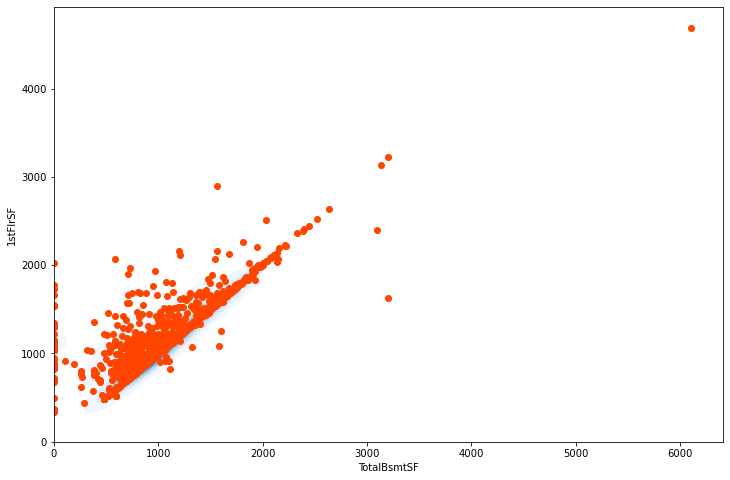

In [44]:
## checking the correlationship between two variables

fig, ax = plt.subplots(1, figsize=(12,8))
sns.kdeplot(data = df, y='1stFlrSF', x='TotalBsmtSF', cmap='Blues',
           shade=True, thresh=0.05, clip=(-1,2000))
plt.scatter(y=df['1stFlrSF'], x=df['TotalBsmtSF'], color='orangered')